<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%ED%95%B5%EC%8B%AC%EB%A7%8C%20%EC%9A%94%EC%95%BD%ED%95%9C%20%ED%86%B5%EA%B3%84%EC%99%80%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%BD%94%EB%93%9C%EB%B6%81/1_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1장. 탐색적 자료 분석


```
- 본격적으로 분석하기 전에 대략적으로 파악 위해 진행 

  + 변수(피처) 종류가 질적인지, 양적인가
  + 통계치는 어떤가 (분위수 / 평균 등)
  + 분포도는 어떻게 되는가 (왜도/첨도 등)



## 1.1 공통 

```
데이터를 로드하여 기본정보 및 기술통계량을 확인해보자


### 1.1.1 데이터 불러오기

[ 출처 : https://www.kaggle.com/c/titanic ] 
```
캐글의 타이타닉 경진대회 데이터를 활용하였다. 
시작 전 한글폰트 설치를 위해 아래 셀을 실행 후 런타임을 다시 시작하자


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
tr_url = 'https://docs.google.com/spreadsheets/d/10duKguzP_OPPNExOt14goitrbEg7tW2eaNM_KCwWN6E/export?format=csv'
te_url = 'https://docs.google.com/spreadsheets/d/1kAsFImVk6KYU9JQ8EFx0tDURaXhRvSfddqKNkrnAXWI/export?format=csv'

train = pd.read_csv(tr_url)
# test = pd.read_csv(te_url)
# all_data = pd.concat([train,test]).reset_index(drop=True)


train.shape

(891, 12)

### 1.1.2 데이터 기본정보 확인

```
resumetable을 통해 
각 변수 별 데이터타입, 결측값개수, 고유값개수, 데이터종류 및 양식을 확인한다.


In [2]:
def resumetable(df):
    print(f'데이터쉐이프 :{df.shape}')
    summary =pd.DataFrame(df.dtypes, columns =['데이터타입'])
    summary['결측값개수'] = df.isna().sum().values
    summary['고유값개수'] = df.nunique().values
    summary['데이터종류'] = '명목형'
    for col in df.columns:
        if df[col].nunique() == 2:
            summary.loc[col,'데이터종류'] = '이진형'
        elif df[col].dtype == float:
            summary.loc[col,'데이터종류'] = '연속형'
        elif (df[col].dtype == int) :
            summary.loc[col,'데이터종류'] = '순서형'            
    summary['첫번째값'] = df.loc[0].values
    return summary

resumetable(train)

데이터쉐이프 :(891, 12)


,데이터타입,결측값개수,고유값개수,데이터종류,첫번째값
PassengerId,int64,0,891,순서형,1
Survived,int64,0,2,이진형,0
Pclass,int64,0,3,순서형,3
Name,object,0,891,명목형,"Braund, Mr. Owen Harris"
Sex,object,0,2,이진형,male
Age,float64,177,88,연속형,22.0
SibSp,int64,0,7,순서형,1
Parch,int64,0,7,순서형,0
Ticket,object,0,681,명목형,A/5 21171
Fare,float64,0,248,연속형,7.25


```
PassenserId는 수치적 정보가 의미 없으니 삭제
Cabin도 결측치가 과반수 이상이니 삭제
Age, Embark의 결측치는 보충 가능
범주형(이진형 포함)은 categorical로 변경


In [3]:
d = ['PassengerId','Cabin']
c = [ 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
train = train.drop(d,axis=1)
train[c] = train[c].astype('category')
for col in c: 
  train[col] = train[col].astype('category')
resumetable(train)

데이터쉐이프 :(891, 10)


,데이터타입,결측값개수,고유값개수,데이터종류,첫번째값
Survived,category,0,2,이진형,0
Pclass,category,0,3,명목형,3
Name,category,0,891,명목형,"Braund, Mr. Owen Harris"
Sex,category,0,2,이진형,male
Age,float64,177,88,연속형,22.0
SibSp,int64,0,7,순서형,1
Parch,int64,0,7,순서형,0
Ticket,category,0,681,명목형,A/5 21171
Fare,float64,0,248,연속형,7.25
Embarked,category,2,3,명목형,S


### 1.1.3 기술통계

``` 
양적변수 (수치형)은 df.describe()로 개수, 고유값, 최대값,최소값, 분위수 등을 
알수 있다. include='all'옵션을 통해 질적변수 (명목형) 도 개수 등을 확인한다.


In [4]:
train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,3
top,0.0,3.0,"Abbing, Mr. Anthony",male,NaN,NaN,NaN,1601,NaN,S
freq,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,644
mean,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


## 1.2 질적변수

```
질적변수의 데이터들은 시리즈 객체에 .value_counts(), DataFrame()을 통해서 
도수분포표, 상대도수분포표로 표현가능


### 1.2.1 도수분포표, 상대도수분포표

In [5]:
import pandas as pd
freq = pd.DataFrame(train['Survived'].value_counts())
freq

,Survived
0,549
1,342


In [6]:
freq['Survived(%)'] = freq['Survived'].apply(lambda x: x/freq['Survived'].sum())
freq = freq.rename(columns = {'Survived':'도수','Survived(%)':'상대도수'})
freq

,도수,상대도수
0,549,0.616162
1,342,0.383838


### 1.2.2 상관계수 : 스피어만 상관계수, 켄달의 타우

```
- 스피어만의 순위상관계수는 관측치의 분포가 극단적인 분포를 보이거나 
  관측치가 순위 정도의 정보밖에 갖고있지 않을 경우에 이 변수들 간의 상관계수를 구한다.

  두 변수의 분포에 대한 가정이 필요 없으며 각 변수들의 관측치를 순위화 한 후 
  각 순위에 대한 편차를 구하여 각 편차를 제곱한 편차제곱합을 이용하여 상관계수를 구한다. 

  스피어만의 순위상관계수의 범위는 피어슨 상관계수의 범위와 동일하게 -1 이상 1 이하이다.

- 켄달의 타우 역시 순위척도로 측정된 변수들 사이의 연관성을 나타내는 측도이며
  두 변수의 분포에 대한 가정이 필요 없는 비모수적 방법의 상관계수이다. 
  
  상관계수의 범위는 스피어만 순위상관계수의 범위와 동일하다.

- 두 상관계수 모두 p-value를 반환하며, 유의수준을 0.05로 설정 시,
  그 이하의 값이 나오면 통게적으로 유의하다고 본다.
  

In [7]:
from scipy.stats import spearmanr, kendalltau

corr, p = spearmanr(train['Survived'],train['Pclass'])
print(f'스피어만 상관계수는 {corr:.3f}, p-value는 {p:.3f}')

corr, p = kendalltau(train['Survived'],train['Pclass'])
print(f'켄달타우 상관계수는 {corr:.3f}, p-value는 {p:.3f}')

스피어만 상관계수는 -0.340, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000


### 1.2.3 질적변수 탐색 시각화

```
막대 그래프, 파이 그래프 등으로 시각화를 위해, matplotlib라이브러리를 사용한다.
질적 변수인 경우, 각 계급이 분리되어 있다는 것을 강조하기 위해서 막대 그래프의 막대가 서로 분리되어있다.


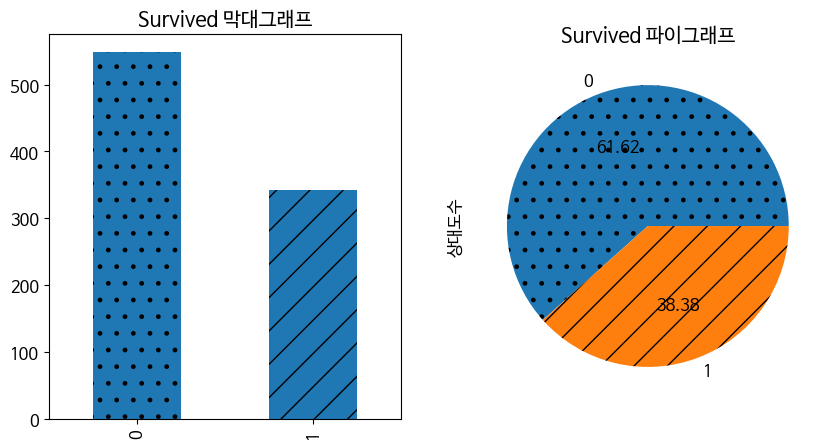

In [26]:
# 환경설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # 그림판 크기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 차트내 폰트지정
plt.rcParams['font.size'] = 12 # 차트내 폰트사이즈
plt.rcParams['axes.unicode_minus'] = False # 축의 마이너스기호 깨지지 않도록 (보통 y축..)
fig, axes = plt.subplots(1,2, figsize = (10,5)) # 큰 그림판은 10,5 사이즈로 두개 쪼개서

# 막대그래프
axes[0].set_title('Survived 막대그래프')
freq['도수'].plot.bar(ax = axes[0],hatch=['.','/'])

# 파이그래프
axes[1].set_title('Survived 파이그래프')
freq['상대도수'].plot.pie(ax = axes[1],autopct='%.2f',hatch=['.','/']);


## 1.3 양적변수

``` 
양적변수는 도수분포표, 상대도수분포표, 대표값, 산포도, 왜도, 첨도, 상관계수, 
줄기잎그림,  히스토그램, 오자이브, 상자그림, 산점도 등으로  데이터를 살펴볼 수 있다


### 1.3.1 도수분포표

``` 
양적 변수의 도수분포표를 그리려면 계급을 설정해줘야 한다.
일반적으로 계급의 수는 5~20개 사이로 정하며, 크기 = (최대값-최소값) / (계급의 수) 로  구한다.
판다스의 cut을 이용하여 쉽게 생성할 수 있다. 


In [32]:
# 계급의 개수를 지정하여 도수분포표 생성
age1 = pd.cut(train['Age'],bins=5)
freq_age1 = pd.DataFrame(age1.value_counts()).reset_index()
freq_age1 = freq_age1.rename(columns={'index':'계급','Age':'도수'}).sort_values(by='계급')
freq_age1

,계급,도수
2,"(0.34, 16.336]",100
0,"(16.336, 32.252]",346
1,"(32.252, 48.168]",188
3,"(48.168, 64.084]",69
4,"(64.084, 80.0]",11


In [35]:
# 계급의 범위를 지정하여 도수분포표 생성
age2 = pd.cut(train['Age'],bins=[0,19,39,59,float('inf')])
freq_age2 = pd.DataFrame(age2.value_counts()).reset_index()
freq_age2 = freq_age2.rename(columns={'index':'계급','Age':'도수'}).sort_values(by='계급')
freq_age2

,계급,도수
1,"(0.0, 19.0]",164
0,"(19.0, 39.0]",387
2,"(39.0, 59.0]",137
3,"(59.0, inf]",26


In [36]:
# freq_age1의 상대도수분포표 생성
freq_age1['상대도수'] = freq_age1['도수'].apply(lambda x : x/freq_age1['도수'].sum())
freq_age1

,계급,도수,상대도수
2,"(0.34, 16.336]",100,0.140056
0,"(16.336, 32.252]",346,0.484594
1,"(32.252, 48.168]",188,0.263305
3,"(48.168, 64.084]",69,0.096639
4,"(64.084, 80.0]",11,0.015406


### 1.3.2 계산적 대표값

``` 
계산적 대표값에는 산술평균, 기하평균, 조화평균, 절사평균, 평방평균 등이 있다.
- 산술평균 (Arithmetic mean) : 주어진 수의 합을 수의 개수로 나눈 것 
- 기하평균 (Geometric mean) : 시간적으로 변화하는 비율의 대표값 
  예> 물가변동률, 경제성장률, 임금인상률 
- 조화평균 (Harmonic mean) : 시간적으로 변화하는 속도 등 상호배타적인 두변수 간 대표값
- 절사평균 (Trimmed mean) : 특정 값 이상 또는 이하를 제거하여 산출한 평균
- 평방평균 (Quadratic mean) : 관측값을 제곱하여 산술평균을 구하고 제곱근 취함
  예> 비정상적 관측치의 영향을 부각시 사용 : RMSE


In [40]:
from scipy.stats.mstats import gmean, hmean, tmean
import numpy as np
print(f'Fare 산술평균 : {train["Fare"].mean():.2f}')

example1 = [1.1,1.3,1.4,1.5]
example2 = [3,6]
example3 = [1,3,5,9,11,1000]
example4 = [1,2,3,4,100]
example5 = [1,2,3,4,5]

def qm(d):
  return np.sqrt(np.mean(np.array(d)**2))

limit_down = np.percentile(example3,10)
limit_up = np.percentile(example3,90)

print(f'example1 기하평균:{gmean(example1):.2f}')
print(f'example2 조화평균:{hmean(example2):.2f}')
print(f'example3 절사평균 1~100값 사이:{tmean(example3, (1,100)):.2f}')
print(f'example3 절사평균 10~90% 분위수 사이:{gmean(example3):.2f}')
print(f'example4 평방평균:{qm(example4):.2f}')
print(f'example5 평방평균:{qm(example5):.2f}')


Fare 산술평균 : 32.20
example1 기하평균:1.32
example2 조화평균:4.00
example3 절사평균 1~100값 사이:5.80
example3 절사평균 10~90% 분위수 사이:10.68
example4 평방평균:44.79
example5 평방평균:3.32


### 1.3.3 위치적 절대값

``` 
위치적 절대값으로는 
중위수(Median), 최빈값(Mode), 사분위수(Quartile) 가 있다.
np.percentile(pd시리즈,분위정수) 또는 pf시리즈.quantile(분위실수) 로 구할 수 있다. 



In [41]:
print('중위수 : ', train['Fare'].median())
print('최빈값 : ', train['Fare'].mode())
print('1분위수 : ', train['Fare'].quantile(0.25))
print('2분위수 : ', train['Fare'].quantile(0.5)) # 2분위수는 중위수와 동일
print('3분위수 : ', train['Fare'].quantile(0.75))
print('10백분위수 : ', train['Fare'].quantile(0.1))
print('10백분위수 : ', np.percentile(train['Fare'],10)) # np.percentile로도 계산가능

중위수 :  14.4542
최빈값 :  0    8.05
Name: Fare, dtype: float64
1분위수 :  7.9104
2분위수 :  14.4542
3분위수 :  31.0
10백분위수 :  7.55
10백분위수 :  7.55


### 1.3.4 절대적 산포도

``` 
절대적 산포도로는 범위(Range), 사분위범위(IQR),평균편차(Mean deviation), 
사분편차(Qurtile deviation), 분산(Variation), 표준편차 (Standard deviation) 이 있다.
- IQR = 3분위수(75%위치) - 1분위수(25%위치) 은 이상치 판별시 대표적으로 쓰인다
- 평균편차 = np.mean(np.abs(관측값 - 평균))
- 사분편차 = IQR / 2


In [43]:
def iqr(data):
  return data.quantile(0.75)-data.quantile(0.25)
def md(data):
  return np.mean(np.abs(np.array(data)-np.mean(data)))

print('범위: ',train['Fare'].max()-train['Fare'].min())
print('사분위범위: %.2f'%iqr(train['Fare']))
print('평균편차: %.2f'%md(train['Fare']))
print('사분편차: %.2f'%(iqr(train['Fare'])/2))

print('모분산: %.2f'%train['Fare'].var(ddof=0))
print('표본분산: %.2f'%train['Fare'].var(ddof=1))

print('모표준편차: %.2f'%train['Fare'].std(ddof=0))
print('표본표준편차: %.2f'%train['Fare'].std(ddof=1))

범위:  512.3292
사분위범위: 23.09
평균편차: 28.16
사분편차: 11.54
모분산: 2466.67
표본분산: 2469.44
모표준편차: 49.67
표본표준편차: 49.69


### 1.3.5 상대적 산포도 

```
상대적 산포도에는 사분위편차계수(CQD), 평균편차계수(CMD), 변동계수(CV)가 있다. 
- 사분위편차계수 = 사분편차/중앙값
- 평균편차계수 = 평균편차/산술평균
- 변동계수 : 자료의 단위가 다르거나 평균의 차이가 클 때 평균에 대한 
  표준편차의 상대적 크기를 비교하기 위해 사용, 변동계수의 제곱은 상대분산



### 1.3.6 왜도, 첨도

```
왜도(Skewness)는 관측값 분포의 비대칭 정도를 나타냄. 정규분포의 왜도는 0 
- 양수일 경우: 우측긴꼬리로 최빈값이 좌측, 평균이 우측에 나옴
첨도(Kurtosis)는 관측값 분포의 모양이 얼마나 뾰족한지를 나타냄. 정규분포의 첨도는 3
- 3보다 큰 경우 : 뾰쪽하고 꼬리가 얇은 분포를 가진다.

판다스로 pd시리즈.skew(), pd시리즈.kurt()로 구할 수 있다
scipy.stats에서도 skew, kurtosis 메소드를 제공한다



In [45]:
train['Fare'].skew(),train['Fare'].kurt()

(4.787316519674893, 33.39814088089868)

In [46]:
from scipy.stats import skew, kurtosis
skew(train['Fare'],bias=False),kurtosis(train['Fare'],bias=False)
# skew(train['Fare'],bias=True),kurtosis(train['Fare'],bias=True) # bias를 True 적용시, 편향치를 조정하여 값이 작아진다

(4.787316519674893, 33.39814088089869)

### 1.3.7 상관계수 : 피어슨의 적률상관계수

```
두 변수 간의 상관관계를 나타내는 값으로 -1 ~ 1 사이의 값을 가진다. 
p-value를 확인하여 유의수준 보다 크면 통계적으로 유의하다고 볼 수 없다.

판다스로 df.corr()으로 구할 수 있다.
scipy.stats에서도 pearsonr메소드를 제공한다


In [48]:
from scipy.stats import pearsonr
titanic = train.dropna() # 결측치가 없어야 함
corr, p = pearsonr(titanic['Age'], titanic['Fare'])
print(f'피어슨 상관계수: {corr:.3f}, p-value : {p:.3f}')

피어슨 상관계수: 0.093, p-value : 0.013


### 1.3.8 양적변수 탐색 시각화

``` 
양적변수를 탐색하는 방법으로 줄기잎그림, 히스토그램, 오자이브, 상자그림, 산점도 등이 있다. 
- 줄기잎그림(Stem-and-leaf plot) : 데이터를 세로선 기준으로 
  줄기와 잎 두부분으로 나누어 구분함으로써 데이터의 대략적 분포를 알수 있게 해준다
  데이터의 수가 많지않을때 이용 가능하며 많을 경우 히스토그램을 사용



In [ ]:
!pip install stemgraphic
import stemgraphic

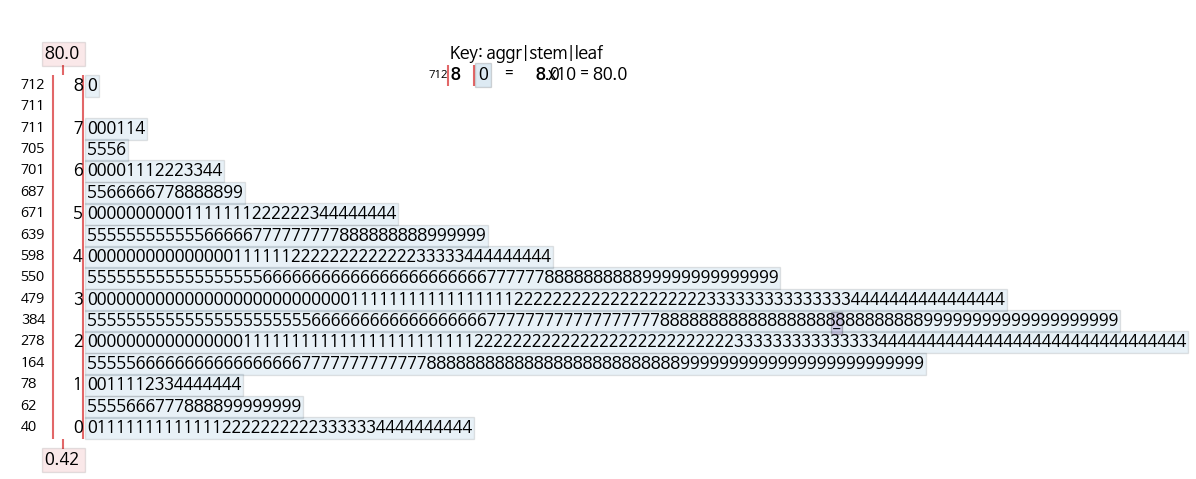

In [55]:
stemgraphic.stem_graphic(titanic['Age'])
plt.show()

```
히스토그램(Histogram)은 도수분포의 상태를 도수분포표의 계급과 도수를 이용하여
기둥 모양으로 나타낸 그래프이다.
x축에는 연속형변수의 계급을 표시하고, y축에는 빈도를 표시 


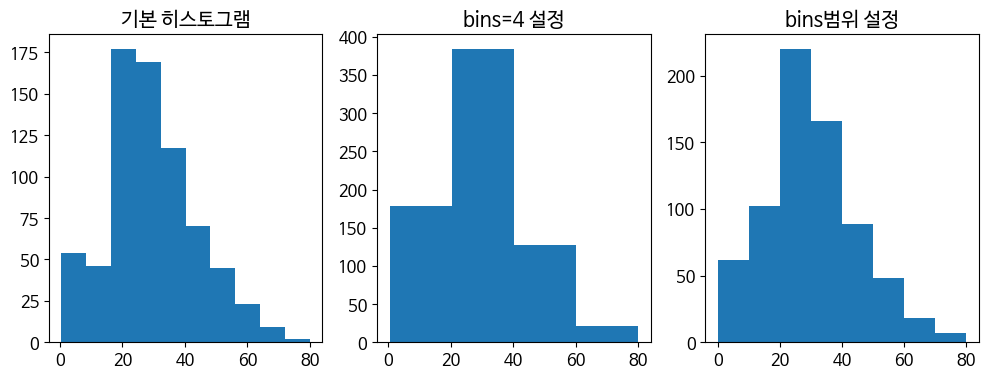

In [59]:
fig, axes = plt.subplots(1,3,figsize=(12,4))

axes[0].hist(titanic['Age'])
axes[0].set_title('기본 히스토그램')

axes[1].hist(titanic['Age'], bins=4)
axes[1].set_title('bins=4 설정')

axes[2].hist(titanic['Age'], bins = [i for i in range(0,90,10)])
axes[2].set_title('bins범위 설정');

```
오자이브(Ogive)는 누적도수다각형의 각 계급구간의 누적도수에 대응하는 기둥의 맨위 중간점들을 직선으로 연결했을 때 나타나는 그래프


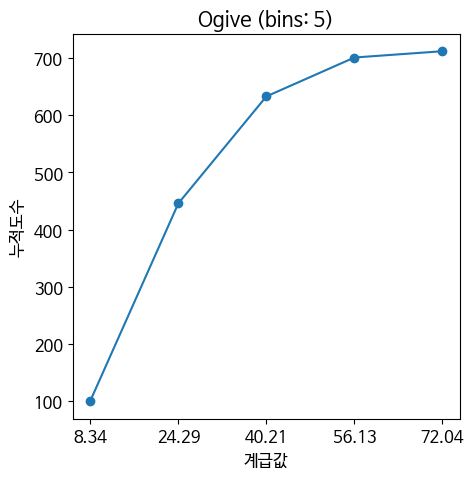

In [62]:
def ogive(data,bins_option):
  import pandas as pd
  result1= pd.cut(data, bins = bins_option)
  freq1 = pd.DataFrame(result1.value_counts()).reset_index(). rename(columns={'index':'계급','Age':'도수'}).sort_values('계급')
  freq1['누적도수'] = freq1['도수'].cumsum()
  freq1['계급값'] = freq1['계급'].apply(lambda x : (x.left + x.right) / 2)
  plt.plot(freq1['계급값'], freq1['누적도수'], marker='o')
  plt.xticks(freq1['계급값'])
  plt.xlabel('계급값')
  plt.ylabel('누적도수')
  plt.title('Ogive (bins: %s)' %bins_option )
  return freq1, plt.show()

freq, img = ogive(data = titanic['Age'] ,bins_option = 5)

```
상자그림(Box plot)은 최소값, 최대값, 1/2/3 사분위 수, 이상치 를 통해 
데이터 산포도를 구체적으로 나타낸다.
df.boxplot() 이므로 단일박스플롯을 그릴때는 이중리스트를 취한다


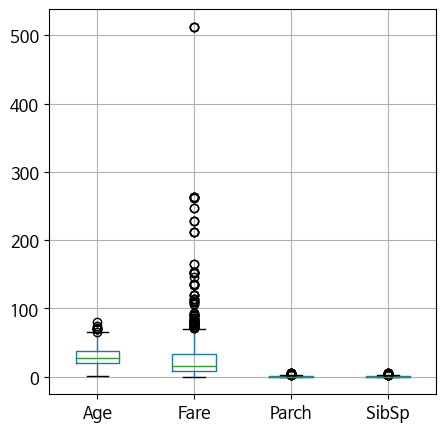

In [72]:
# 수치형 값만 일괄로 상자그림 확인
titanic[titanic.columns.difference(c)].boxplot(); 

``` 
산점도(Scatter plot)은 두 변수의 2차원 데이터를 좌표평면 위에 점으로 나타낸 그래프이다.
상관관계를 보는데 유리하다



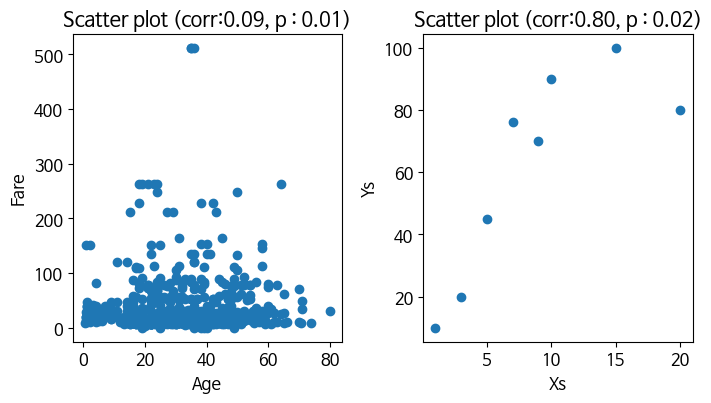

In [82]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

axes[0].scatter(titanic['Age'],titanic['Fare'])
axes[0].set_title("Scatter plot (corr:%.2f, p : %.2f)" %(pearsonr(titanic['Age'],titanic['Fare'])))
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')

Xs= [1,3,5,7,9,15,20,10]
Ys = [10,20,45,76,70,100,80,90]
axes[1].scatter(Xs,Ys)
axes[1].set_title("Scatter plot (corr:%.2f, p : %.2f)" %(pearsonr(Xs,Ys)))
axes[1].set_xlabel('Xs')
axes[1].set_ylabel('Ys')

plt.show();

```
seaborn의 pairplot을 통해 변수간의 상관도와 각 변수의 히스토그램을 한눈에 볼수 있다


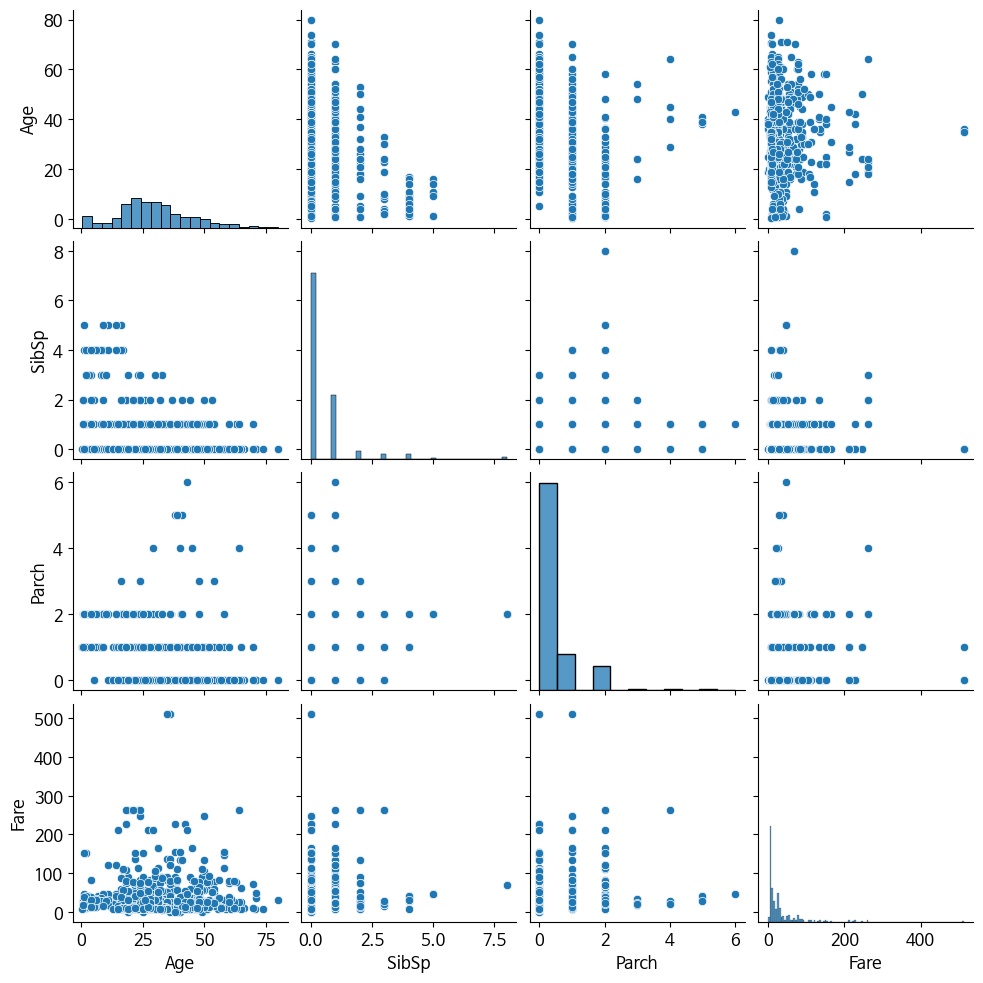

In [76]:
import seaborn as sns

sns.pairplot(train);

```
df.corr()을 통해 변수간 피어슨상관계수를 구하고
seaborn의 히트맵을 통해 시각화하여, 상관관계를 표시한다.


<ipython-input-81-1ee60331c18b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



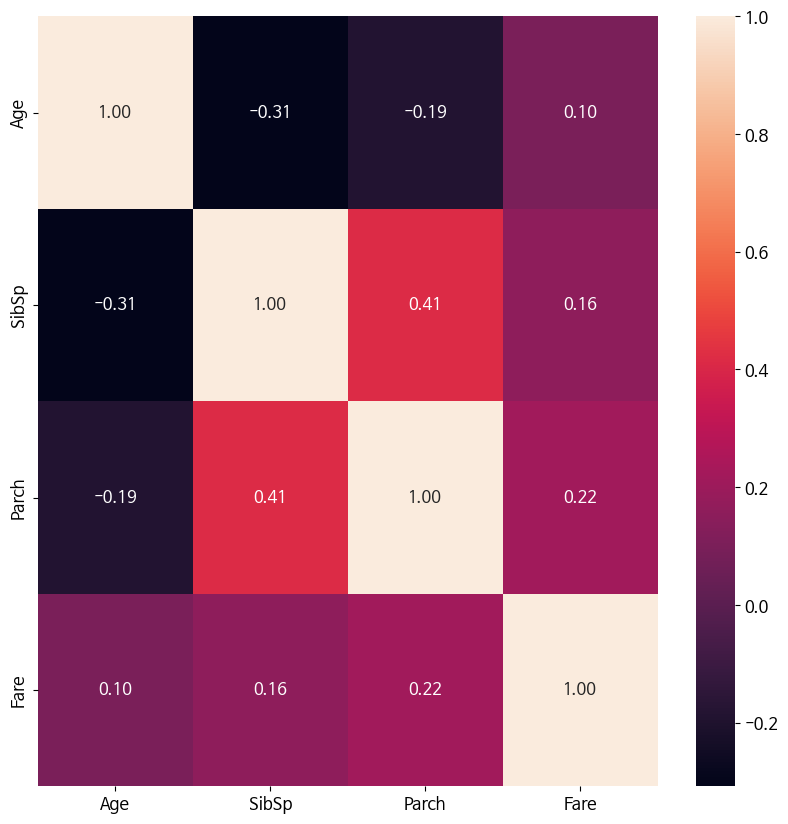

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),
            annot = True,
            fmt='.2f')
plt.show();